# TransKit

*your personal digital endocrinologist*
(though I don't want to overpromise!)

TransKit is a project to help you keep track of your hormonal transition.

In [1]:
%load_ext autoreload
%autoreload 2


%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sys

sys.path.insert(0, "../")
from transkit import pharma, medications, fit

## Sample Transition

In [2]:
import data.transition_sample as ts

ts_doses = pharma.createDoses(np.array(ts.doses))
ts_estradiol_measurements = pharma.createMeasurements(np.array(ts.estradiol_measurements))

### Calibration

In [4]:
_, ts_ec_cali = fit.calibrateDoseResponse_lsqpoly(
    ts_doses,
    medications.medications,
    "ec",
    ts_estradiol_measurements)

calibrated_medications = dict(medications.medications)
calibrated_medications["ec"] = pharma.calibratedDoseResponse(
    calibrated_medications["ec"],
    ts_ec_cali)

with np.printoptions(precision=9, suppress=True, floatmode='fixed'):
    print(f"ts_ec_cali = np.{repr(ts_ec_cali)}")

ts_ec_cali = np.array([0.000000000, 0.468750000])


### Plotting

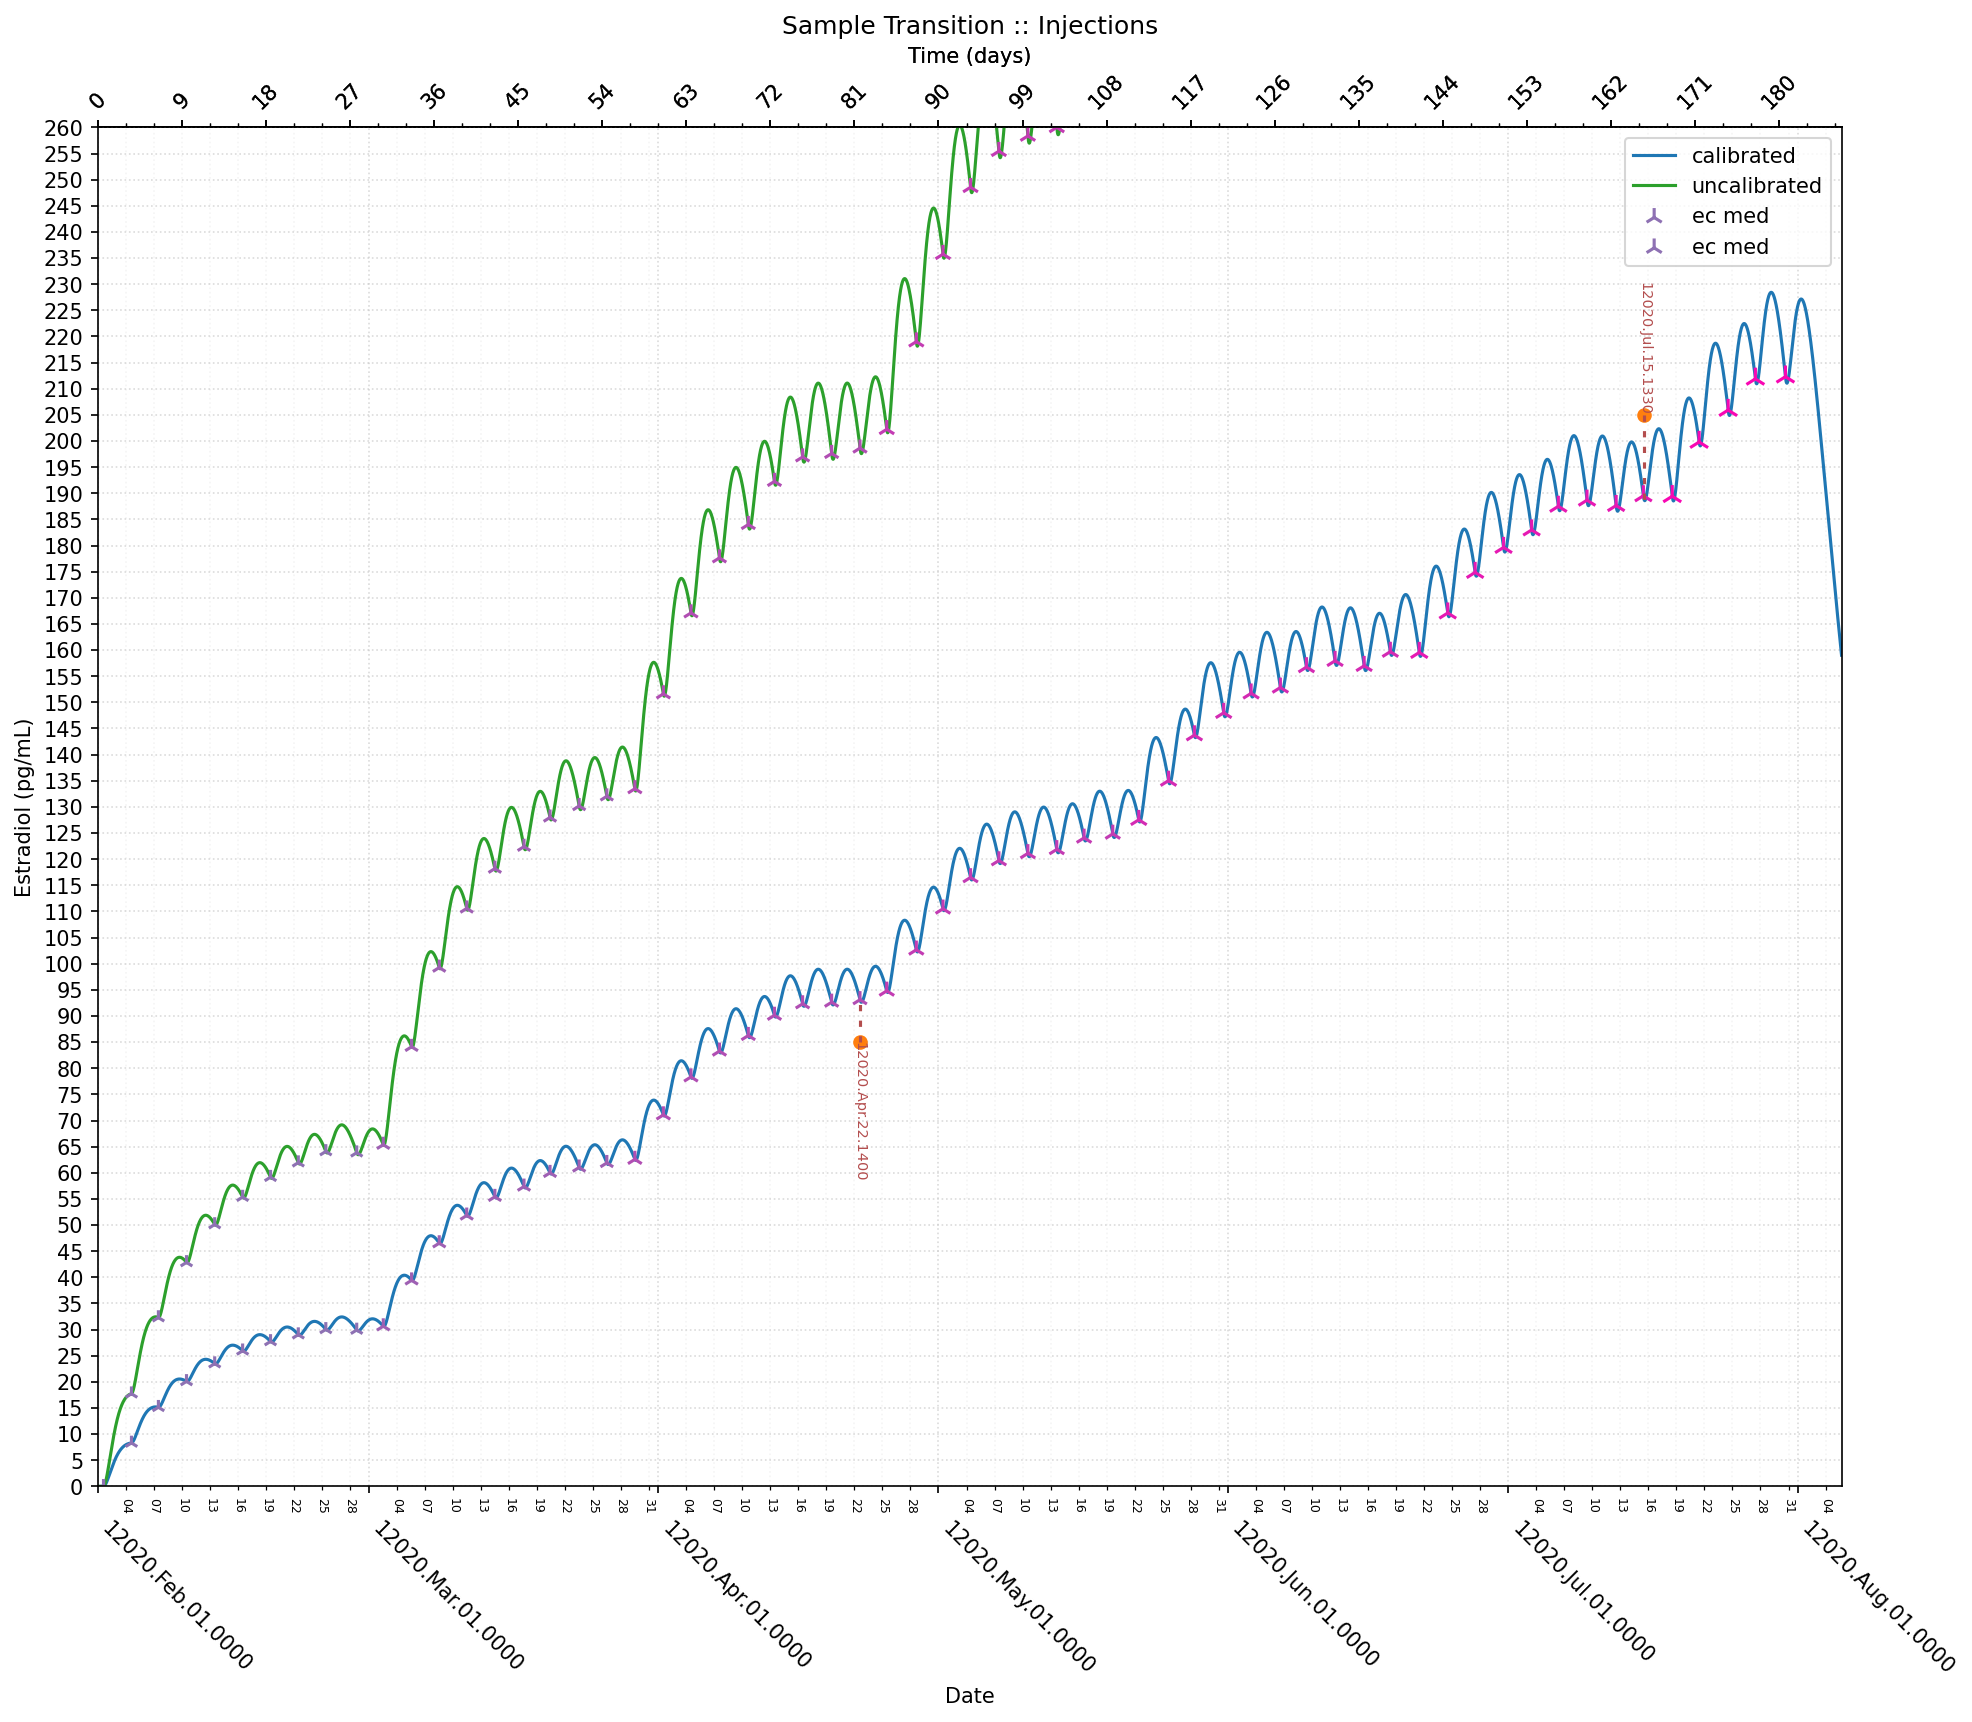

In [5]:
fig,ax = pharma.startPlot()
ax.set_title('Sample Transition :: Injections')
ax.set_ylim(bottom=0, top=260)
ax.set_yticks(range(0, 261, 5))
pharma.plotDoses(
    fig, ax,
    ts_doses,
    calibrated_medications,
    estradiol_measurements=ts_estradiol_measurements,
    label="calibrated")
pharma.plotDoses(
    fig, ax,
    ts_doses,
    medications.medications,
    label="uncalibrated")